In [9]:
# loading packages
using PyPlot
using Distributions
using Optim

In [10]:
function identity(x::Float64)
    # identity function
    return x
end

identity (generic function with 1 method)

In [11]:
function sigmoid(x::Float64)
    # sigmoid function
    y = exp(x)/(1+exp(x))
    return y
end

sigmoid (generic function with 1 method)

In [12]:
function cal_obj(X::Matrix{Float64}, y::Vector{Float64}, beta::Vector{Float64}, link_fun::Function, lambda::Float64)
    # calculate the objective function
    f = 0
    (n, p) = size(X)
    if link_fun==identity
        for i = 1:n
            lin_pred = beta[1]+dot(beta[2:end], vec(X[i, :]))
            f = f+(y[i]-lin_pred)^2
        end
        f = f/2
    else
        for i = 1:n
            lin_pred = beta[1]+dot(beta[2:end], vec(X[i, :]))
            f = f+log(1+exp(lin_pred))-y[i]*lin_pred
        end
    end
    f = f/n+lambda/2*norm(beta[2:end])^2
    return f
end

cal_obj (generic function with 1 method)

In [13]:
function sgd(X::Matrix{Float64}, y::Vector{Float64}, beta_init::Vector{Float64}, link_fun::Function, lambda::Float64,
    gamma0::Float64, max_iter=1e6, eval=false)
    # stochastic gradient descent for ridge regression and regularized (l2-norm) logistic regression
    # learning rate gamma_t = gamma0/(1+gamma0*lambda*t)
    # make sure beta_init will be unchanged
    beta = copy(beta_init)
    (n, p) = size(X)
    t = 0
    beta_new = zeros(Float64, p+1)
    max_epoch = round(Int, ceil(max_iter/n))
    # stores eval
    f = zeros(Float64, max_epoch*n)
    for epoch = 1:max_epoch
        # random permutation
        idx = collect(1:n)
        shuffle!(idx)
        for i = 1:n
            t = t+1
            # when t=1, gamma_t=gamma0
            gamma_t = gamma0/(1+gamma0*lambda*(t-1))
            err_term = -y[idx[i]]+link_fun(beta[1]+dot(beta[2:end], vec(X[idx[i], :])))
            beta_new[1] = beta[1]-gamma_t*err_term
            beta_new[2:end] = beta[2:end]-gamma_t*lambda*beta[2:end]-gamma_t*err_term*vec(X[idx[i], :])
            if eval
                f[t] = cal_obj(X, y, beta_new, link_fun, lambda)
            end
            for j = 1:p+1
                beta[j] = beta_new[j]
            end
        end 
    end
    if eval
        return beta, f
    else
        return beta
    end
end

sgd (generic function with 3 methods)

## Simulation 1: Ridge Regression

In [14]:
# the underlying model coefficients
beta = [3.0, -4.0, 5.0]  

3-element Array{Float64,1}:
  3.0
 -4.0
  5.0

In [15]:
# generate 100 sample features
n = 100
X = randn(n, 2)  

100x2 Array{Float64,2}:
 -0.583171    1.2449    
 -0.971005   -0.0210151 
  1.69764     1.69948   
  0.959458   -0.728807  
  0.0222367   0.300559  
  0.876112   -0.802153  
 -1.32335     2.16682   
 -0.757819   -0.106327  
  0.0150875  -0.00861295
  0.921816   -0.56862   
  0.107026    0.598436  
  2.07681    -0.895444  
 -0.429312    0.879739  
  ⋮                     
  0.629477    0.581746  
  0.141066   -0.0319641 
  2.19861     0.254433  
 -1.06322    -0.780303  
 -0.250349   -0.806091  
  0.979702   -0.697077  
 -1.9782     -0.105999  
  0.323679   -0.0586646 
  0.454688    0.387208  
  1.45067     1.35517   
 -0.89092     0.244778  
 -0.0228052   0.942253  

In [16]:
# generate the responses, adding some noise
sig = 0.1
y = beta[1]+X*vec(beta[2:end])+sig*randn(n)  

100-element Array{Float64,1}:
 11.6012   
  6.85773  
  4.79993  
 -4.55376  
  4.43267  
 -4.49798  
 19.1141   
  5.50015  
  2.77666  
 -3.41908  
  5.71159  
 -9.81765  
  9.1724   
  ⋮        
  3.39515  
  2.50364  
 -4.59379  
  3.27736  
  0.0707259
 -4.47656  
 10.3562   
  1.44704  
  3.07295  
  3.96811  
  7.71308  
  7.94608  

In [46]:
beta_init = zeros(Float64, 3)
lambda = 1e-4
(beta_hat, f) = sgd(X, y, beta_init, identity, lambda, 0.3, 1e6, true)

([3.0036104107126866,-4.000567013341443,5.0191882015680305],[1.3861,1.07736,1.10218,0.558367,0.347497,0.460148,0.456272,0.400298,0.383833,0.229814  …  0.00651245,0.00651253,0.00651623,0.00651569,0.00651582,0.00651584,0.00651721,0.00651752,0.00651314,0.00650683])

In [47]:
beta_hat

3-element Array{Float64,1}:
  3.00361
 -4.00057
  5.01919

In [48]:
PyPlot.svg(true)

true

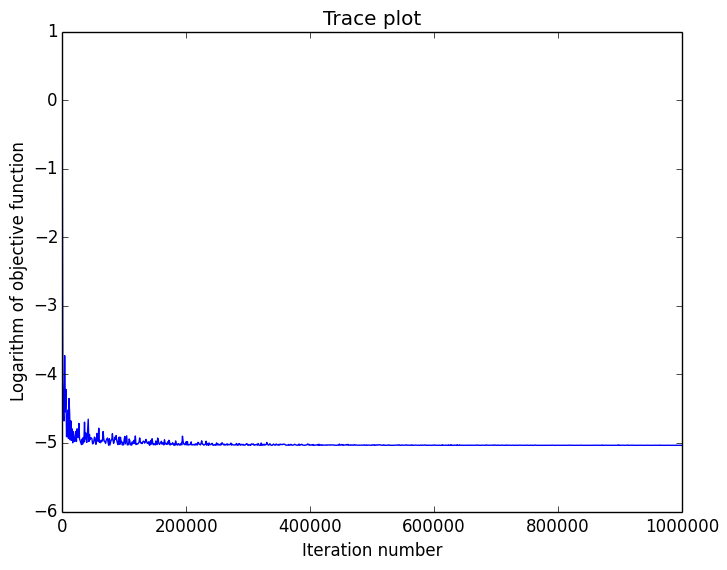

In [54]:
plot(1:1000:1000000, log(f[1:1000:1000000]))
xlabel("Iteration number");
ylabel("Logarithm of objective function");
title("Trace plot");
savefig("trace_plot.eps")

## Simulation 2: Logistic Regression

In [55]:
p = 100
beta = randn(p+1)

101-element Array{Float64,1}:
  0.111365
 -0.39488 
  0.228392
  1.47518 
 -1.43635 
  0.76896 
 -0.024029
 -0.349056
  1.50484 
  0.966028
 -1.40318 
  0.227324
 -1.13426 
  ⋮       
 -1.38168 
  0.528449
  0.182664
 -0.142819
  0.461183
  0.556181
 -1.05571 
  0.576261
 -1.00278 
 -1.13161 
  1.80962 
 -1.35791 

In [56]:
n = 1000000
X = randn(n, p)

1000000x100 Array{Float64,2}:
  1.61719    -1.65077      0.378564  …   0.80211      0.506168  -0.474577 
  0.188394    0.323004     1.11977       1.68015      1.04115    0.762194 
  0.279615   -1.01524      1.05282      -1.71778     -0.10364    0.765419 
 -1.1565     -0.854652    -1.17783      -0.635115     0.345301  -2.18847  
  1.32801     1.22534      0.526442     -0.187554    -1.04453   -0.527556 
  2.16786     0.234011     1.18162   …  -0.839294    -0.089363  -1.76808  
  0.1572     -0.439558    -0.648022     -2.15507      0.515458  -0.408599 
 -1.23389     0.866207     0.313969      0.0811189    0.903874   1.36584  
 -0.228185    0.0876585   -1.55348      -0.348265    -0.651498   0.119013 
  0.41779     0.261066    -1.03086      -0.668181    -0.582049   0.027994 
 -0.0838109   0.261878     0.804134  …   0.7902       0.506186  -1.20214  
  1.07555     0.27597      0.981039     -0.440509    -0.525532   0.524447 
 -0.579852   -0.00346613   1.54956      -0.416688    -1.42651    0.470

In [57]:
lin_pred = beta[1]+X*vec(beta[2:end])
theta = zeros(n)
y = zeros(n)
for i = 1:n
    theta[i] = sigmoid(lin_pred[i])
    y[i] = rand(Bernoulli(theta[i]))
end

In [91]:
beta_init = zeros(Float64, p+1)
tic()
beta_hat = sgd(X, y, beta_init, sigmoid, lambda, 0.005)
toc();

elapsed time: 9.449696993 seconds


In [92]:
beta_hat

101-element Array{Float64,1}:
  0.0985153
 -0.463078 
  0.256002 
  1.4018   
 -1.40686  
  0.694782 
 -0.0716831
 -0.33605  
  1.48509  
  0.94303  
 -1.41721  
  0.255828 
 -1.11927  
  ⋮        
 -1.36295  
  0.518534 
  0.183958 
 -0.142634 
  0.441405 
  0.546126 
 -1.02381  
  0.604678 
 -0.926639 
 -1.15318  
  1.82456  
 -1.32623  

### Stochastic Gradient Descent vs L-BFGS

In [64]:
f_log_uni(beta) = cal_obj(X, y, beta, sigmoid, lambda)

f_log_uni (generic function with 1 method)

In [65]:
function grd_log(X, y, beta, link_fun, lambda, g)
    (n, p) = size(X)
    for i = 1:p+1
        g[i] = 0
    end
    for i = 1:n
        err_term = -y[i]+link_fun(beta[1]+dot(beta[2:end], vec(X[i, :])))
        g[1] = g[1]+err_term
        g[2:end] = g[2:end]+lambda*beta[2:end]+err_term*vec(X[i, :])
    end
    for i = 1:p+1
        g[i] = g[i]/n
    end
    return 0
end

grd_log (generic function with 1 method)

In [66]:
grd_log_uni(beta, g) = grd_log(X, y, beta, sigmoid, lambda, g)

grd_log_uni (generic function with 1 method)

In [67]:
beta_init = zeros(Float64, p+1)
tic()
res = optimize(f_log_uni, grd_log_uni, beta_init, method = :l_bfgs)
toc();

elapsed time: 151.491975037 seconds


In [68]:
res

Results of Optimization Algorithm
 * Algorithm: L-BFGS
 * Starting Point: [0.0,0.0, ...]
 * Minimum: [0.11265245979332834,-0.36984979396344736, ...]
 * Value of Function at Minimum: 0.141961
 * Iterations: 8
 * Convergence: true
   * |x - x'| < 1.0e-32: false
   * |f(x) - f(x')| / |f(x)| < 1.0e-08: false
   * |g(x)| < 1.0e-08: true
   * Exceeded Maximum Number of Iterations: false
 * Objective Function Calls: 33
 * Gradient Call: 33

In [69]:
beta_hat2 = res.minimum

101-element Array{Float64,1}:
  0.112652
 -0.36985 
  0.215302
  1.40181 
 -1.35973 
  0.727253
 -0.030653
 -0.327741
  1.41668 
  0.913104
 -1.33958 
  0.214068
 -1.07549 
  ⋮       
 -1.30586 
  0.500618
  0.162869
 -0.131104
  0.439804
  0.526872
 -0.99848 
  0.54044 
 -0.941634
 -1.08322 
  1.71919 
 -1.28691 

In [93]:
sqrt(mean((beta-beta_hat).^2))

0.04926078945866942

In [71]:
sqrt(mean((beta-beta_hat2).^2))

0.04923705873902063

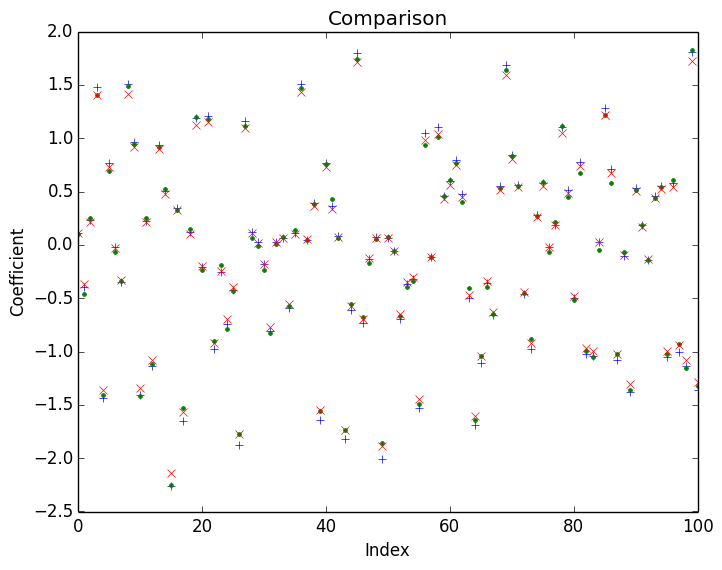

In [113]:
plot(beta, "+")
hold(true)
plot(beta_hat, ".")
plot(beta_hat2, "x")
xlabel("Index")
ylabel("Coefficient")
title("Comparison")
savefig("comp.eps")